In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gudhi import plot_persistence_diagram

The ion bombadment of the semiconductor surfaces results in a near-hexagonal nanodotpattern formation. In particular, patterns formed by the bombardment of germanium are modeled by the anisotropic Kuramoto-Sivashinsky type equation, the Bradley-Shipman equation:
$$\frac{\partial u}{\partial t}=-\nabla^2u+\kappa\nabla^2\nabla^2u-\sigma\nabla^2(\nabla^2u)^2+\delta(\partial_xu_x^3+\partial_yu_y^3)$$
The nature of $\sigma$ was studied here: Rachel A Neville. Topological techniques for characterization of patterns in differential equations. PhD thesis, ColoradoState University, 2017.\
We first focus on the parameter $\kappa$. The data is approximated as solutions to the equation above (holding $\sigma$ and $\delta$ constant and letting $\kappa$ vary), and is given by the matlab structure. In total we have 850 samples, with kappa varying from 1 to 5 with a step of 0.25, 50 samples per each value of kappa. 

In [2]:
import mat73
def data():
    Data=mat73.loadmat('/scratch/mb2864/Data/GE_Data_221013_normPH.mat', use_attrdict=True)
    return Data

In [3]:
Data = data()

In [6]:
data_array=[10,210,410,610,810]

In the data we have access to the following for each value of kappa:
1. Twenty $200\times200$ matrices with solutions to diff. eq. for time $t=1,2,3,\ldots,20$. Surfaces (matrices) are normalized (scaled) for mean=0, std=1 
1. Persistance diagrams (PDs) at time $t=10$ and $t=20$

Let's look at some pictures. We will plot some surfaces and corresponding PDs:

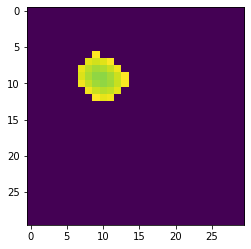

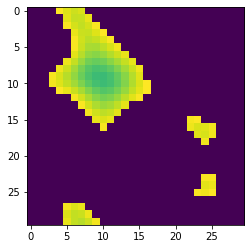

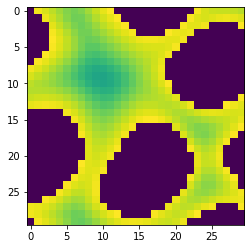

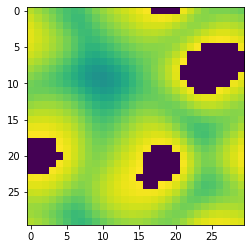

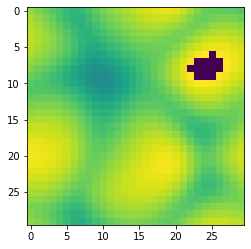

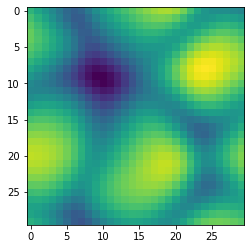

In [79]:
import numpy as np
import matplotlib.pyplot as plt

r = [-2,-1,0,1,1.5,2]
Surface=np.array(Data.X.hknorm[700])
Surface = Surface[20:50,10:40,19]
for r in r:
    fig,ax=plt.subplots()
    im=plt.imshow(np.where(Surface<=r,Surface,-7),cmap='viridis')
    plt.show()
    filename = 'Filtration zoomedin r='+str(r)+'.pdf'
    fig.savefig(filename)

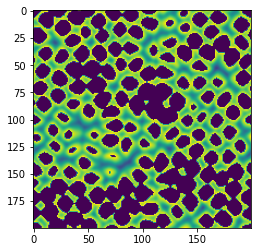

In [49]:
plt.imshow(np.where(Surface<=0,Surface,-4))

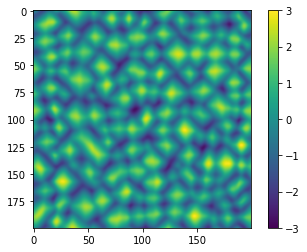

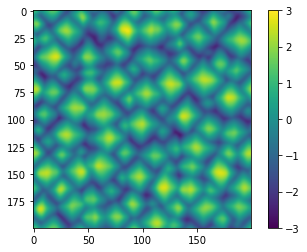

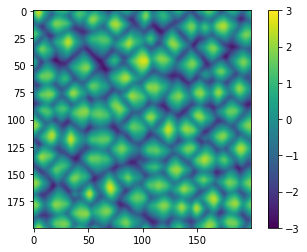

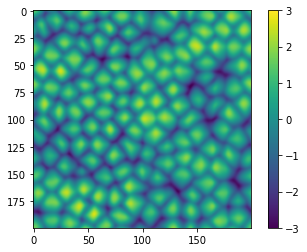

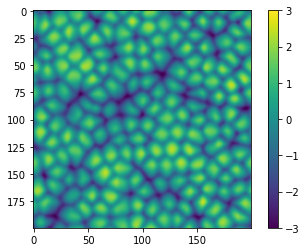

In [6]:
import numpy as np
import matplotlib.pyplot as plt


for j in data_array:
    fig,ax=plt.subplots()
    Surface=np.array(Data.X.hknorm[j])
    im=plt.imshow(Surface[:,:,19])
    plt.colorbar(im)
    plt.clim([-3,3])
    plt.show()
    

usetex mode requires TeX.


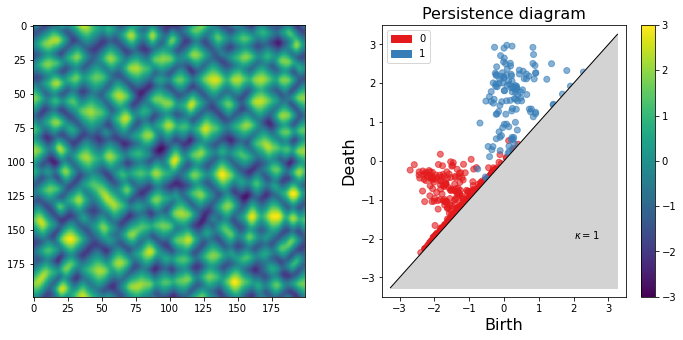

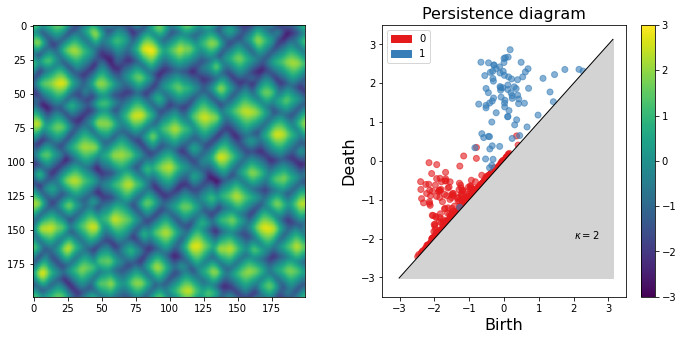

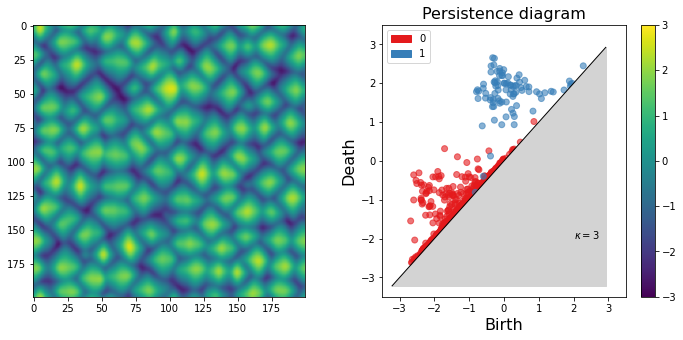

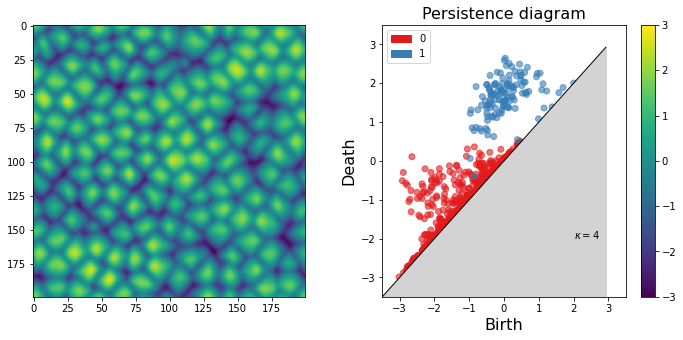

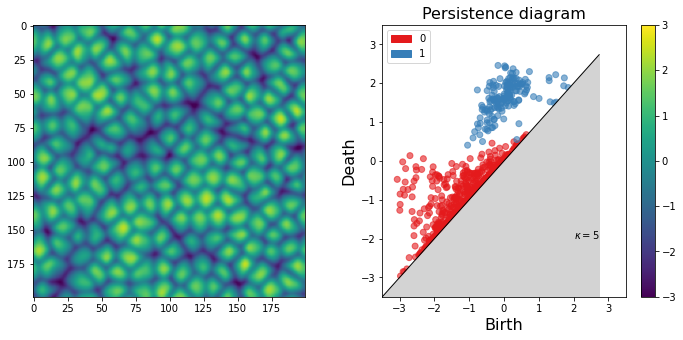

In [5]:
import numpy as np
from gudhi import plot_persistence_diagram
from gudhi import plot_persistence_density
import matplotlib.pyplot as plt


k=0
kappa=[1,2,3,4,5]
for j in data_array:
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12, 5))
    Surface=np.array(Data.X.hknorm[j])
    im=ax1.imshow(Surface[:,:,19])
    plt.colorbar(im)
    im.set_clim([-3,3])
    s='$\kappa=$'+str(kappa[k])
    
    
    PD0=(Data.X.h0_t20_n[j])
    PD1=(Data.X.h1_t20_n[j])

    PD0=np.concatenate((np.zeros([len(PD0),1]),PD0),axis=1)
    PD1=np.concatenate((np.ones([len(PD1),1]),PD1),axis=1)
    PD=np.concatenate((PD0,PD1),axis=0)
    PD=[(int(PD[i,0]),[PD[i,1],PD[i,2]])for i in range(len(PD[:,0]))]
    plot_persistence_diagram(PD,legend=True,axes=ax2)
    ax2.set_xlim([-3.5,3.5])
    ax2.set_ylim([-3.5,3.5])
    ax2.text(2,-2,s)
    k=k+1
    plt.show()
#plot_persistence_diagram(PD1,legend=True)

We have several way to "vectorize" the persistence diagram. One of the ways is the persistence images (ref:Persistence Images: A Stable Vector Representation of Persistent Homology,Henry Adams, Tegan Emerson, Michael Kirby, Rachel Neville, Chris Peterson, Patrick Shipman, Sofya Chepushtanova, Eric Hanson, Francis Motta, Lori Ziegelmeier)
Observe that we have control over the weighting function. Usually, we want to weight "longer bars" (meaning points with higher persistence) higher, so we use an increasing function. Linear function, tanh, arctan, and sigmoid seem to performing the best as we will see later.

usetex mode requires TeX.


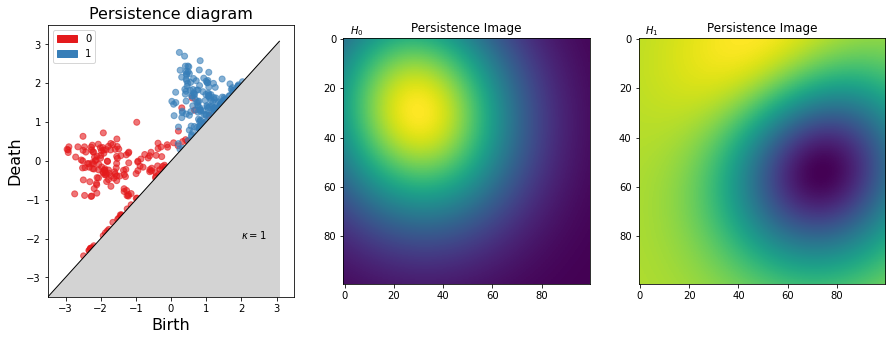

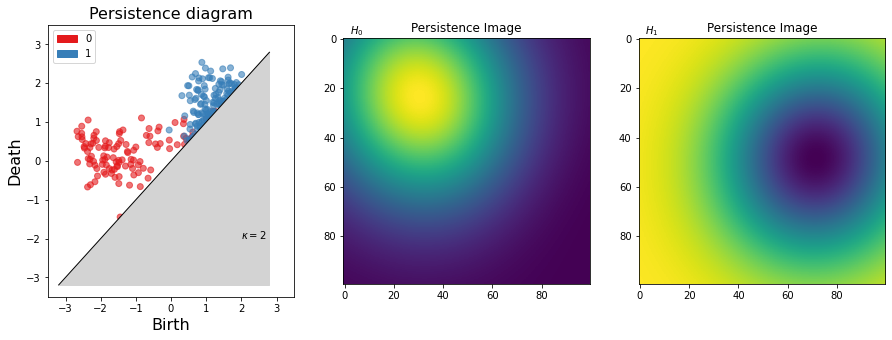

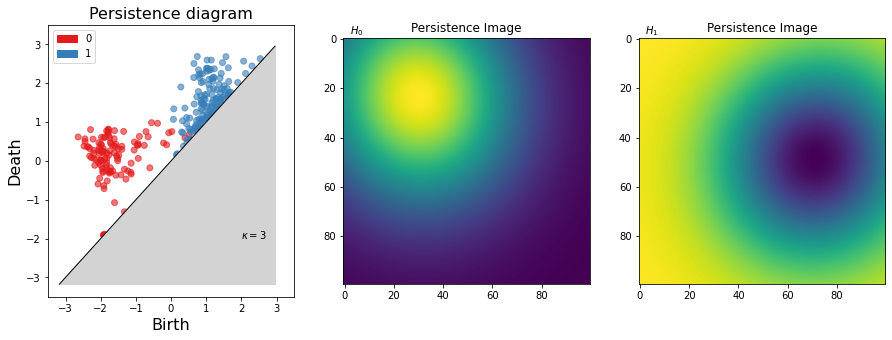

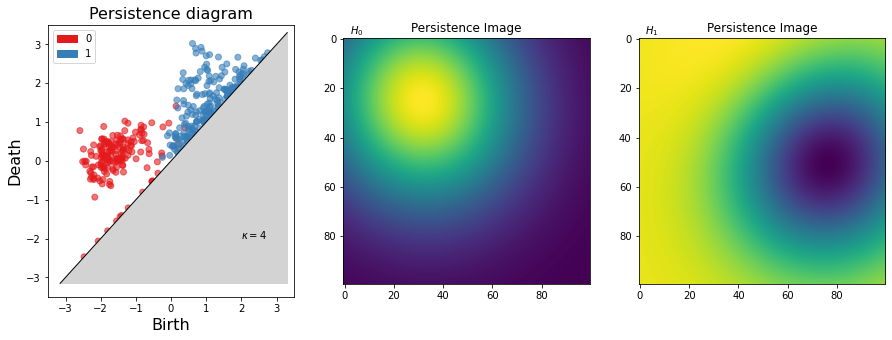

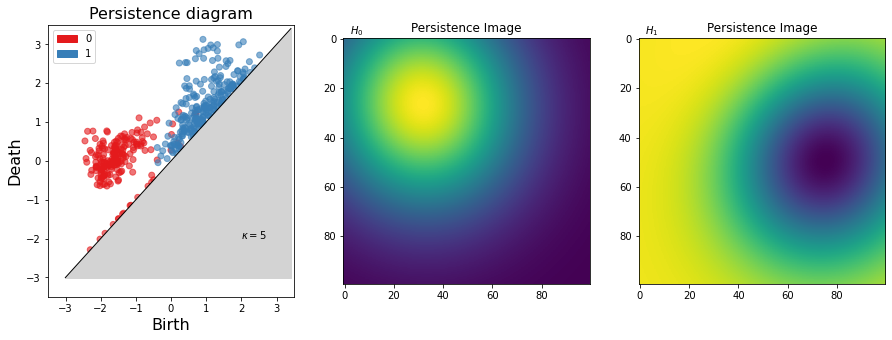

In [20]:
from gudhi.representations import PersistenceImage
import numpy as np
#Persistence Images

k=1
r=100
PD=[]
for j in data_array:
    
    s='$\kappa=$'+str(k)
    
    PD0=(Data.X.h0_t20_n_flip[j])
    PD1=(Data.X.h1_t20_n_flip[j])
    
    PI = PersistenceImage(bandwidth=2, weight=lambda x: np.tanh(x[1]-x[0]), \
                                           im_range=[-4,3.5,-3.5,3.5],   resolution=[r,r])
    pers_image0=PI.fit_transform([PD0])
    
    pers_image1=PI.fit_transform([PD1])
    
    
    PD0=np.concatenate((np.zeros([len(PD0),1]),PD0),axis=1)
    PD1=np.concatenate((np.ones([len(PD1),1]),PD1),axis=1)
    PD=np.concatenate((PD0,PD1),axis=0)
    PD=[(int(PD[i,0]),[PD[i,1],PD[i,2]])for i in range(len(PD[:,0]))]
    
    
    #Plot Persistence Images
    fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15, 5))
    
    plot_persistence_diagram(PD,legend=True,axes=axs[0])
    axs[0].set_xlim([-3.5,3.5])
    axs[0].set_ylim([-3.5,3.5])
    axs[0].text(2,-2,s)
    
    
    axs[1].imshow(np.flip(np.reshape(pers_image0, [r,r]), 0))
    axs[2].imshow(np.flip(np.reshape(pers_image1, [r,r]), 0))
    
    axs[1].set_title('Persistence Image')
    axs[1].text(2,-2,'$H_0$')
    
    axs[2].set_title('Persistence Image')
    axs[2].text(2,-2,'$H_1$')
    
    #ax4.imshow(np.flip(np.reshape(pers_image1+pers_image0, [r,r]), 0))
    #ax4.set_title('Persistence Image')
    #ax4.text(0,-2,'$H_1-H_0$')
    
    
    #plt.show()
    k=k+1
    
    #fig.savefig(s+'Persistence Images.pdf')

In [4]:
pers_image0

NameError: name 'pers_image0' is not defined

Empirically, we have deduced that using ML on persistence images of the flipped surfaces gives the best results, so we put all PDs in a list and compute PIs for all of them

In [28]:
ListOfPDs=[]

for j in range(850):#data_array: 
    pers_diag=Data.X.h0_t20_n_flip[j]
    pers_diag0=np.array(pers_diag[:,0])
    pers_diag1 = np.array(pers_diag[:,1])
    pers_diag = np.concatenate((pers_diag[:,0],pers_diag[:,1]))
    ListOfPDs.append(pers_diag)

In [29]:
Lengths = [i.shape[0] for i in ListOfPDs]
m = max(Lengths)

In [31]:
Withzeros = [np.concatenate((i,np.zeros([m-len(i)])),axis=0) for i in ListOfPDs]

In [30]:
ListOfPDs[0]

array([-2.59582611e+00, -2.45283301e+00, -2.41343399e+00, -2.41506545e+00,
       -2.32806760e+00, -2.22302594e+00, -2.20093576e+00, -2.11937552e+00,
       -2.02176176e+00, -2.00118096e+00, -1.95202216e+00, -2.09266146e+00,
       -1.80483075e+00, -1.81113708e+00, -1.84674380e+00, -1.72303927e+00,
       -1.71610515e+00, -1.71112501e+00, -1.67290744e+00, -1.63513814e+00,
       -1.62291465e+00, -1.63303489e+00, -1.64645887e+00, -1.58094372e+00,
       -1.55362295e+00, -1.55404491e+00, -1.92143353e+00, -1.18482978e+00,
       -1.54219142e+00, -2.32389111e+00, -1.93861523e+00, -2.02510204e+00,
       -2.29616301e+00, -1.79410539e+00, -1.75967378e+00, -6.73573351e-01,
       -1.64002314e+00, -2.13577252e+00, -1.09369137e+00, -2.43263121e+00,
       -5.40626595e-01, -1.58669625e+00, -1.29797957e+00, -9.14525467e-01,
       -1.04789623e+00, -7.05669000e-01, -9.05803277e-01, -1.69546223e+00,
       -2.04529817e+00, -1.98569407e+00, -4.23030610e-01, -2.11772486e+00,
       -1.28229793e+00, -

In [22]:
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [6]:
ListOfPDs=[]

for j in range(850):#data_array: 
    pers_diag0=Data.X.h0_t20_n_flip[j]
    pers_diag1=Data.X.h1_t20_n_flip[j]
    pers_diag=np.concatenate((np.array(pers_diag0),np.array(pers_diag1)),axis=0)
    ListOfPDs.append(pers_diag)

In [64]:
SurfaceStacked=[]

for j in range(850):#data_array: 
    Surface=Data.X.hknorm[j][:,:,19]
#    pers_diag=np.array(pers_diag)
    SurfaceStacked.append(Surface.reshape(1,40000))
SurfaceStacked = np.array(SurfaceStacked)

(200, 200)

In [52]:
for j in range(850):
    pers_diag = Data.X.h0_t20_n_flip[j]
    pers_diag = np.array(pers_diag).reshape(1,2*pers_diag.shape[0])
    pers_diag = np.concatenate((pers_diag,np.zeros([1,434-pers_diag.shape[0]])),axis=1)
    if j==0:
        ListOfPDs = pers_diag
    else:
        ListOfPDs = np.concatenate((ListOfPDs,pers_diag),axis=0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 765 and the array at index 1 has size 773

In [56]:
#max([ListOfPDs[i].shape[0] for i in range(len(ListOfPDs))])
 

(166, 2)

In [47]:
ListOfPDs.shape

(1, 249014)

In [17]:
from gudhi.representations import PersistenceImage
r=50
#Persistence Images

PI = PersistenceImage(bandwidth=1, weight=lambda x: np.tanh(x[1]-x[0]), \
                                       im_range=[-4,3.5,-3,3.5],   resolution=[r,r])

#Prom_point=ProminentPoints(use=True,num_pts=1000,location='upper',threshold=0.5)
#Prom_point0=Prom_point.fit_transform(ListOfPDs)
pi=PI.fit_transform(ListOfPDs)


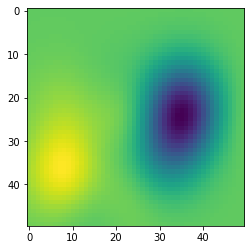

In [12]:
fig,ax = plt.subplots()
ax.imshow((pi[1]-pi[0]).reshape(r,r))

In [27]:
from gudhi.representations import PersistenceImage
r=50
#Persistence Images

PI = PersistenceImage(bandwidth=1, weight=lambda x: np.tanh(x[1]-x[0]), \
                                       im_range=[-4,3,-3,3],   resolution=[r,r])

#Prom_point=ProminentPoints(use=True,num_pts=1000,location='upper',threshold=0.5)
#Prom_point0=Prom_point.fit_transform(ListOfPDs)
pi=PI.fit_transform(ListOfPDs)

In [21]:
def coord_matrix():
    
    #gudhi.plot_persistence_diagram(data.X.h0_t20[2])
    
    f1=np.zeros([850,1])
    f2=np.zeros([850,1])
    f3=np.zeros([850,1])
    f4=np.zeros([850,1])
    f5=np.zeros([850,1])
    f6=np.zeros([850,1])
    M= np.zeros([850,10])
    
    for k in range(2):
        for j in range(850):
            if k==0:
                H0_pers=Data.X.h0_t20_n[j]
            if k==1:
                H0_pers=Data.X.h1_t20_n[j]
            H0_pers=np.array(H0_pers)    
            p=[H0_pers[i,1]-H0_pers[i,0] for i in range(len(H0_pers))]
            
            p=np.array(p)
            
            b=H0_pers[:,0]
            d=H0_pers[:,1]
            b=np.array(b)
            d=np.array(d)
            d_max=np.max(d)
            #Carlson Coordinates
            f1[j]=np.sum(d*p)#/len(d) 
            f2[j]=(d_max*np.sum(p)-np.sum(d*p))#/len(d)
            f3[j]=np.sum(b**2*(p)**4)#/len(d)
            f4[j]=d_max**2*np.sum((1-d/d_max)**2*p**4)#/len(d)
            f5[j]=np.max(p)
            #f6[j]=np.sum(1/p)
        if k==0:
            M[:,0:5]=np.concatenate((f1,f2,f3,f4,f5),axis=1)
        else:
            M[:,5:10]=np.concatenate((f1,f2,f3,f4,f5),axis=1)

    return(M)

In [22]:
y = coord_matrix()
y.shape

(850, 10)

Now we run a scikit learn grid search over available parameters for various classification algorithms

In [32]:
from sklearn.preprocessing   import MinMaxScaler
from sklearn.pipeline        import Pipeline
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from gudhi.representations import PersistenceImage
import pandas as pd

#X=ListOfPDs
#X=pi
X = Withzeros
#X=coord_matrix()
#SurfaceStacked = SurfaceStacked.reshape(850,40000)
#X=SurfaceStacked


lbls=np.zeros([850,1])

for j in range(17):
    lbls[50*j:50*j+50]=j*np.ones([50,1])
    
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(
    X, lbls, test_size=0.33, random_state=0)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

classifiers = [
    Pipeline(
        [
            #("preprocess", PersistenceImage()),
            ("knn", KNeighborsClassifier())
        ]
    ),
    Pipeline(
        [   #("preprocess", PersistenceImage()),
            ("svm", SVC())
        ]
    ),
    Pipeline(
        [   #("preprocess", PersistenceImage()),
            ("rfc", RandomForestClassifier())
        ]
    ),
    #Pipeline(
        #[   #("preprocess", PersistenceImage()),
         #   ("nnet", MLPClassifier())
        #]
    #),
]

names=["KNN","SVC","RandomForest"]

param_grid=[#{'preprocess__bandwidth':[1], 'preprocess__weight':[lambda x: np.tanh(x[1])],'preprocess__im_range':\
             #[[-4,3,-3,3]],   'preprocess__resolution':[[50,50]]},
            {'knn__n_neighbors': [1, 3, 5, 7, 9, 11,20,50,100], 'knn__algorithm': ['auto','ball_tree', 'kd_tree'],\
             'knn__weights':['uniform', 'distance']},
            {'svm__C': [1, 10], 'svm__kernel': ['linear', 'rbf','sigmoid'],'svm__gamma':['auto','scale']},
            {'rfc__criterion': ['gini'],'rfc__n_estimators':[5,10,50,100,200,500],\
             'rfc__max_depth':[2,5,10,50,100,None]},
            #{'nnet__alpha': [0.0001],'nnet__max_iter':[1000,2000]}
            ]


for name,clf,params in zip(names,classifiers,param_grid):
    model = GridSearchCV(clf, params, cv=5)
    model_fit= model.fit(X,np.ravel(lbls))#(X_train,np.ravel(y_train))
    print(model.best_params_)
    #score= model_fit.score(X_test, y_test)
    #print("{} score: {}".format(name, score))
    results_df = pd.DataFrame(model.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
    ).rename_axis("kernel")
    results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
    display(results_df)
    results_df.to_excel(name+'.xlsx')

{'knn__algorithm': 'auto', 'knn__n_neighbors': 20, 'knn__weights': 'distance'}


mean_fit_time  std_fit_time  mean_score_time  \
kernel                                                                 
ball_tree_20_distance        0.000885      0.000031         0.003020   
kd_tree_20_distance          0.001009      0.000053         0.002781   
auto_20_distance             0.001015      0.000049         0.002775   
ball_tree_9_uniform          0.000846      0.000028         0.005190   
kd_tree_9_uniform            0.001036      0.000005         0.005584   
auto_9_uniform               0.000940      0.000046         0.004933   
ball_tree_11_distance        0.000893      0.000027         0.002672   
kd_tree_11_distance          0.001016      0.000050         0.002402   
auto_11_distance             0.001017      0.000052         0.002407   
ball_tree_20_uniform         0.000848      0.000027         0.005567   
ball_tree_9_distance         0.000887      0.000027         0.002578   
kd_tree_20_uniform           0.000939      0.000047         0.005245   
kd_tree_9_distance           0.001037      0.000001         0.002349   
auto_9_distance              0.001014      0.000050         0.002345   
auto_20_uniform              0.000942      0.000047         0.005275   
auto_11_uniform              0.000940      0.000047         0.004991   
kd_tree_11_uniform           0.001016      0.000048         0.005425   
ball_tree_11_uniform         0.000864      0.000032         0.005425   
kd_tree_7_uniform            0.000942      0.000051         0.004856   
auto_7_uniform               0.000992      0.000062         0.005118   
ball_tree_7_uniform          0.000848      0.000028         0.005143   
kd_tree_7_distance           0.001011      0.000048         0.002238   
ball_tree_7_distance         0.000887      0.000031         0.002458   
auto_7_distance              0.001015      0.000050         0.002238   
kd_tree_50_distance          0.001018      0.000047         0.003868   
ball_tree_50_distance        0.000888      0.000034         0.004084   
auto_50_distance             0.001012      0.000047         0.003862   
ball_tree_3_distance         0.000888      0.000029         0.002241   
kd_tree_3_distance           0.001013      0.000051         0.002007   
auto_3_distance              0.001013      0.000052         0.002045   
ball_tree_5_distance         0.000890      0.000031         0.002330   
auto_5_distance              0.001020      0.000051         0.002151   
kd_tree_5_distance           0.001016      0.000050         0.002122   
auto_5_uniform               0.001044      0.000016         0.005333   
kd_tree_5_uniform            0.001014      0.000045         0.005183   
ball_tree_5_uniform          0.000855      0.000024         0.005036   
ball_tree_3_uniform          0.000843      0.000029         0.004952   
auto_3_uniform               0.001027      0.000056         0.005102   
kd_tree_3_uniform            0.000940      0.000046         0.004814   
kd_tree_100_distance         0.001015      0.000049         0.005699   
ball_tree_100_distance       0.000895      0.000028         0.005926   
auto_100_distance            0.001019      0.000049         0.005713   
ball_tree_50_uniform         0.000849      0.000028         0.006314   
auto_50_uniform              0.000943      0.000046         0.006023   
kd_tree_50_uniform           0.000944      0.000044         0.006075   
kd_tree_1_uniform            0.001042      0.000005         0.005025   
ball_tree_1_distance         0.000891      0.000027         0.001993   
ball_tree_1_uniform          0.000853      0.000041         0.004696   
auto_1_distance              0.001042      0.000002         0.001821   
kd_tree_1_distance           0.001038      0.000003         0.001802   
auto_1_uniform               0.001081      0.000065         0.005139   
ball_tree_100_uniform        0.000851      0.000028         0.007543   
kd_tree_100_uniform          0.000942      0.000046         0.007255   
auto_100_uniform             0.000941      0.000044         0.00

{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'linear'}


mean_fit_time  std_fit_time  mean_score_time  \
kernel                                                           
1_auto_linear          0.018612      0.001109         0.004853   
1_scale_linear         0.018605      0.001114         0.004871   
10_scale_rbf           0.025935      0.000537         0.008866   
1_scale_rbf            0.027258      0.000238         0.009464   
1_auto_rbf             0.053114      0.000678         0.009416   
10_auto_linear         0.050100      0.005529         0.004580   
10_scale_linear        0.050214      0.005607         0.004589   
1_scale_sigmoid        0.033462      0.000197         0.011372   
10_auto_rbf            0.055417      0.000790         0.009258   
10_scale_sigmoid       0.025835      0.000146         0.009997   
1_auto_sigmoid         0.042704      0.000296         0.012468   
10_auto_sigmoid        0.034068      0.000472         0.011967   

                  std_score_time param_svm__C param_svm__gamma  \
kernel                                                           
1_auto_linear           0.000041            1             auto   
1_scale_linear          0.000086            1            scale   
10_scale_rbf            0.000396           10            scale   
1_scale_rbf             0.000113            1            scale   
1_auto_rbf              0.000069            1             auto   
10_auto_linear          0.000030           10             auto   
10_scale_linear         0.000031           10            scale   
1_scale_sigmoid         0.000048            1            scale   
10_auto_rbf             0.000102           10             auto   
10_scale_sigmoid        0.000164           10            scale   
1_auto_sigmoid          0.000027            1             auto   
10_auto_sigmoid         0.000114           10             auto   

                 param_svm__kernel  \
kernel                               
1_auto_linear               linear   
1_scale_linear              linear   
10_scale_rbf                   rbf   
1_scale_rbf                    rbf   
1_auto_rbf                     rbf   
10_auto_linear              linear   
10_scale_linear             linear   
1_scale_sigmoid            sigmoid   
10_auto_rbf                    rbf   
10_scale_sigmoid           sigmoid   
1_auto_sigmoid             sigmoid   
10_auto_sigmoid            sigmoid   

                                                             params  \
kernel                                                                
1_auto_linear     {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...   
1_scale_linear    {'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...   
10_scale_rbf      {'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...   
1_scale_rbf       {'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...   
1_auto_rbf        {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...   
10_auto_linear    {'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...   
10_scale_linear   {'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...   
1_scale_sigmoid   {'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...   
10_auto_rbf       {'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...   
10_scale_sigmoid  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...   
1_auto_sigmoid    {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...   
10_auto_sigmoid   {'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...   

                  split0_test_score  split1_test_score  split2_test_score  \
kernel                                                                      
1_auto_linear              0.635294           0.623529           0.576471   
1_scale_linear             0.635294           0.623529           0.576471   
10_scale_rbf               0.647059           0.635294           0.570588   
1_scale_rbf                0.617647           0.600000           0.588235   
1_auto_rbf                 0.600000           0.605882           0.582353   
10_auto_linear             0.582353           0.623529           0.552941   
10_scale_linear         

{'rfc__criterion': 'gini', 'rfc__max_depth': 10, 'rfc__n_estimators': 50}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
kernel                                                                        
gini_10_50          0.112885      0.000564         0.005216        0.000039   
gini_None_200       0.464727      0.002074         0.019846        0.000246   
gini_100_200        0.464228      0.002364         0.019883        0.000292   
gini_10_200         0.451607      0.001899         0.019111        0.000043   
gini_10_100         0.225928      0.000700         0.009844        0.000105   
gini_100_500        1.177048      0.025529         0.048990        0.000370   
gini_10_500         1.128156      0.003973         0.047903        0.000352   
gini_None_500       1.162235      0.001932         0.048869        0.000214   
gini_5_100          0.182527      0.000357         0.008825        0.000029   
gini_100_50         0.116537      0.000474         0.005296        0.000047   
gini_50_500         1.161145      0.003808         0.048731        0.000065   
gini_50_200         0.464625      0.001337         0.019737        0.000185   
gini_50_100         0.232486      0.001036         0.010071        0.000147   
gini_50_50          0.116567      0.000512         0.005278        0.000044   
gini_5_500          0.911505      0.002988         0.041944        0.000141   
gini_100_100        0.232872      0.001818         0.009974        0.000074   
gini_None_100       0.233358      0.000890         0.010116        0.000087   
gini_5_200          0.364607      0.001109         0.017083        0.000116   
gini_None_50        0.116424      0.000685         0.005283        0.000013   
gini_5_50           0.091717      0.000474         0.004780        0.000034   
gini_100_10         0.023967      0.000123         0.001586        0.000004   
gini_50_10          0.023746      0.000229         0.001591        0.000006   
gini_5_10           0.018890      0.000132         0.001495        0.000005   
gini_None_10        0.024015      0.000069         0.001596        0.000010   
gini_10_10          0.023174      0.000130         0.001577        0.000004   
gini_10_5           0.011956      0.000110         0.001112        0.000013   
gini_2_50           0.070904      0.000213         0.004528        0.000015   
gini_5_5            0.009823      0.000057         0.001070        0.000009   
gini_None_5         0.012292      0.000118         0.001124        0.000011   
gini_2_200          0.281162      0.000303         0.016081        0.000023   
gini_100_5          0.012417      0.000256         0.001120        0.000013   
gini_2_500          0.703717      0.001269         0.039441        0.000083   
gini_50_5           0.012217      0.000198         0.001127        0.000010   
gini_2_100          0.141024      0.000319         0.008397        0.000014   
gini_2_10           0.014834      0.000052         0.001447        0.000006   
gini_2_5            0.007869      0.000120         0.001061        0.000017   

              param_rfc__criterion param_rfc__max_depth  \
kernel                                                    
gini_10_50                    gini                   10   
gini_None_200                 gini                 None   
gini_100_200                  gini                  100   
gini_10_200                   gini                   10   
gini_10_100                   gini                   10   
gini_100_500                  gini                  100   
gini_10_500                   gini                   10   
gini_None_500                 gini                 None   
gini_5_100                    gini                    5   
gini_100_50                   gini                  100   
gini_50_500                   gini                   50   
gini_50_200                   gini                   50   
gini_50_100                   gini                   50   
gini_50_50                    gini                   50   
gini_5_500                    gini                    5   
gini_100_

In [18]:
ListOfPDs = np.array(ListOfPDs)

In [13]:
X.shape

(850, 10)

We can also remove the near-diagonal entries, as they might be taken as noise. 

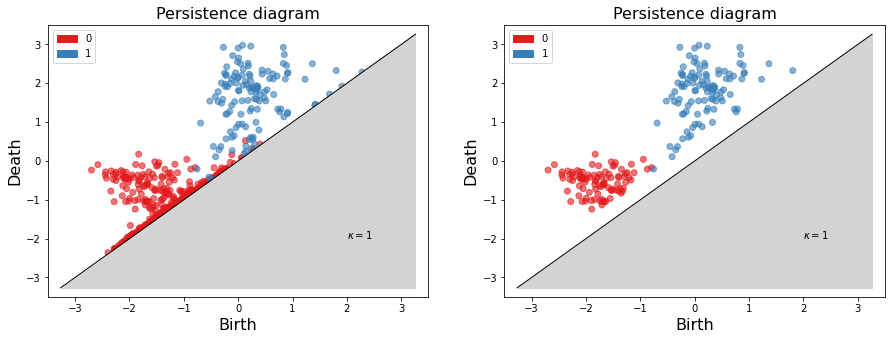

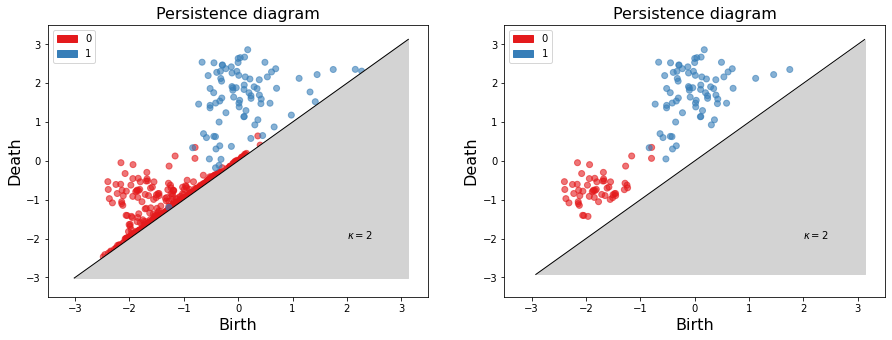

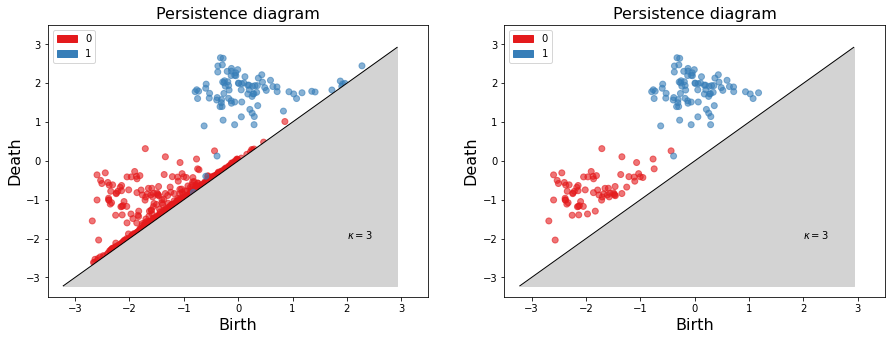

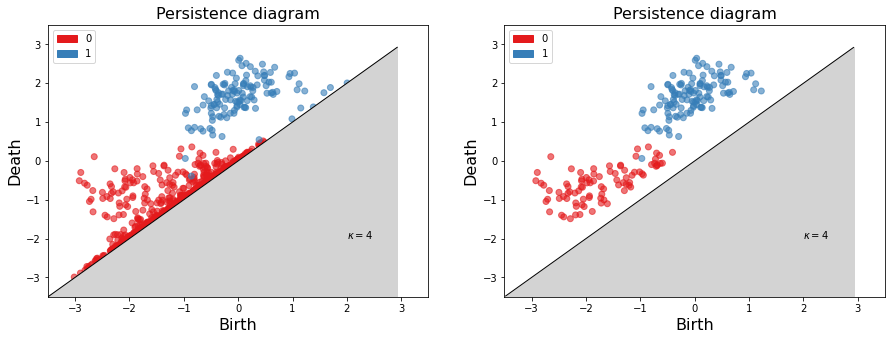

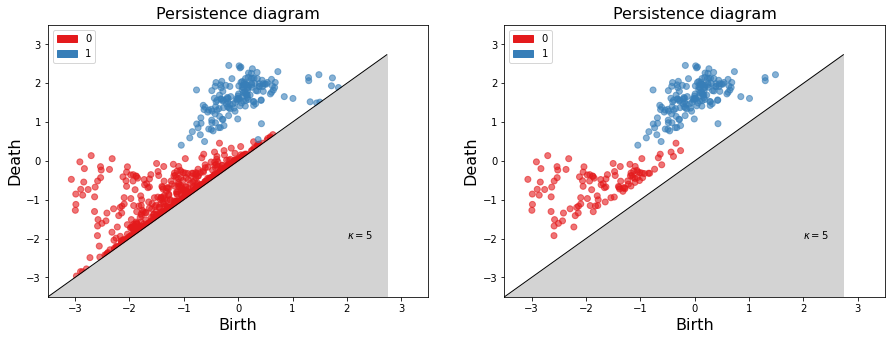

In [19]:
from gudhi.representations.preprocessing import ProminentPoints

k=1
for j in data_array:
    
    s='$\kappa=$'+str(k)
    
    PD0=(Data.X.h0_t20_n[j])
    PD1=(Data.X.h1_t20_n[j])
    
    
    Prom_point=ProminentPoints(use=True,num_pts=1000,location='upper',threshold=0.5)
    Prom_point0=Prom_point.fit_transform([PD0])
    Prom_point1=Prom_point.fit_transform([PD1])
    
    
    
    Prom_point0=np.concatenate((np.zeros([len(Prom_point0[0]),1]),Prom_point0[0]),axis=1)
    Prom_point1=np.concatenate((np.ones([len(Prom_point1[0]),1]),Prom_point1[0]),axis=1)
    PD_prom=np.concatenate((Prom_point0,Prom_point1),axis=0)
    PD_prom=[(int(PD_prom[i,0]),[PD_prom[i,1],PD_prom[i,2]])for i in range(len(PD_prom[:,0]))]
    
    PD0=np.concatenate((np.zeros([len(PD0),1]),PD0),axis=1)
    PD1=np.concatenate((np.ones([len(PD1),1]),PD1),axis=1)
    PD=np.concatenate((PD0,PD1),axis=0)
    PD=[(int(PD[i,0]),[PD[i,1],PD[i,2]])for i in range(len(PD[:,0]))]
    
    #Plot Persistence Images
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
    
    plot_persistence_diagram(PD,legend=True,axes=ax1)
    ax1.set_xlim([-3.5,3.5])
    ax1.set_ylim([-3.5,3.5])
    ax1.text(2,-2,s)
    
    plot_persistence_diagram(PD_prom,legend=True,axes=ax2)
    ax2.set_xlim([-3.5,3.5])
    ax2.set_ylim([-3.5,3.5])
    ax2.text(2,-2,s)
    k=k+1

We can also define pairwise distances between various persistence diagrams, using the bottlneck distance, although I am unsure whether it is very applicable. We can see that the bottleneck distance cluster pretty well after aplying the MDS(PCA) on the distance matrix.

In [10]:
from sklearn.manifold import MDS
import pandas as pd

X=pd.read_csv(r'Distance_matrixH_1_25_normalized.csv',header=None)


#X=coord_matrix()
#X=pi

embedding = MDS(n_components=3,dissimilarity='precomputed')
X_transformed = embedding.fit_transform(X)


<IPython.core.display.Javascript object>


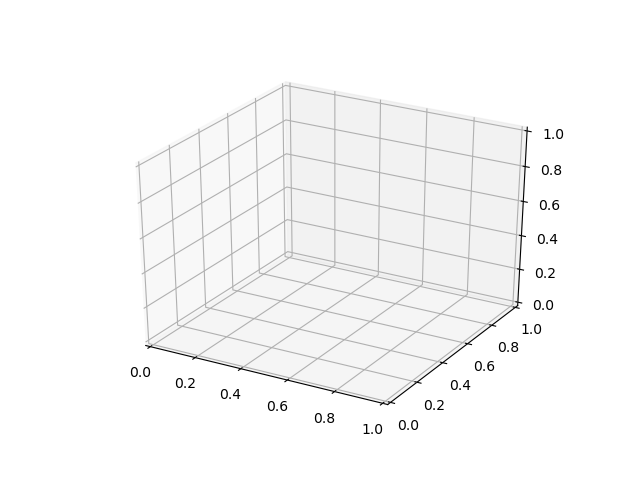

<IPython.core.display.Javascript object>


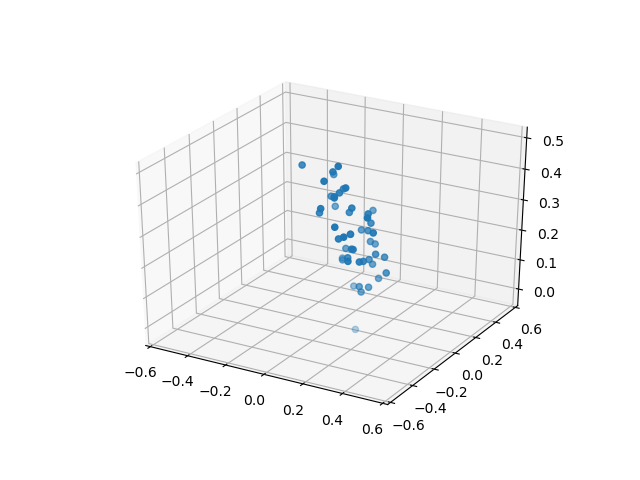

<IPython.core.display.Javascript object>


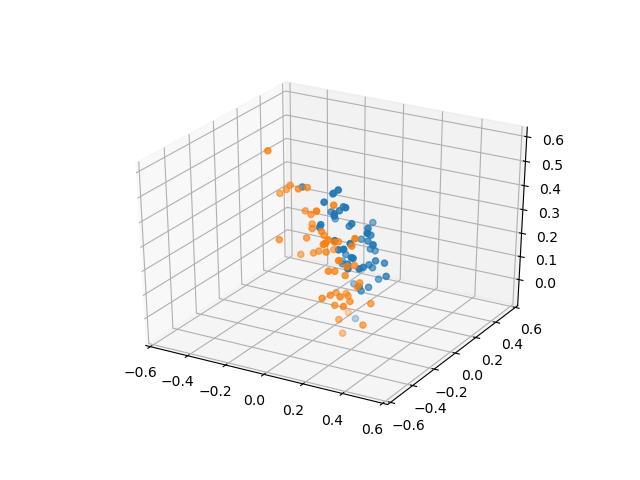

<IPython.core.display.Javascript object>


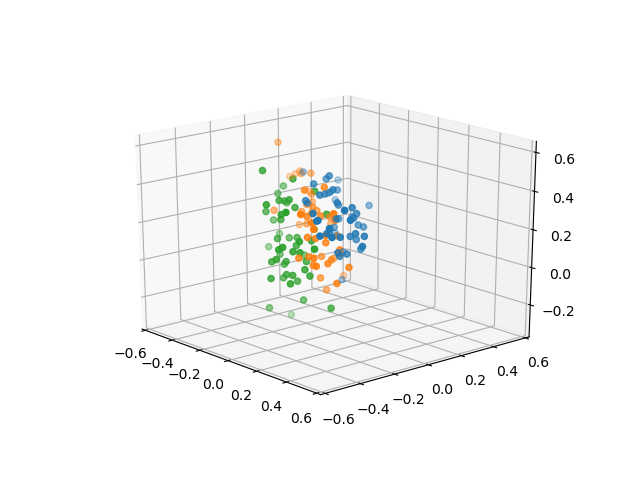

<IPython.core.display.Javascript object>


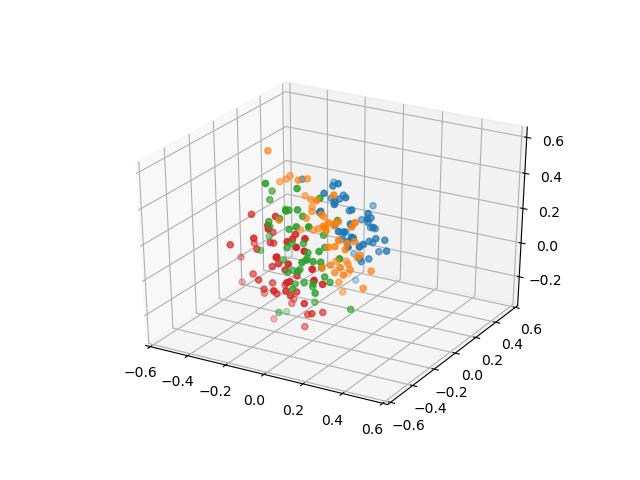

<IPython.core.display.Javascript object>


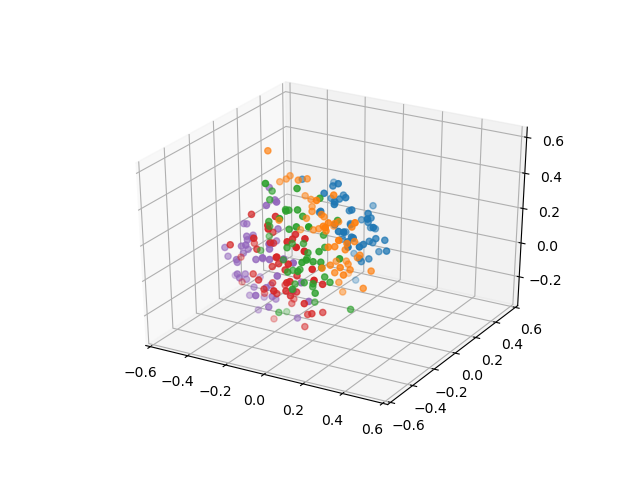

<IPython.core.display.Javascript object>


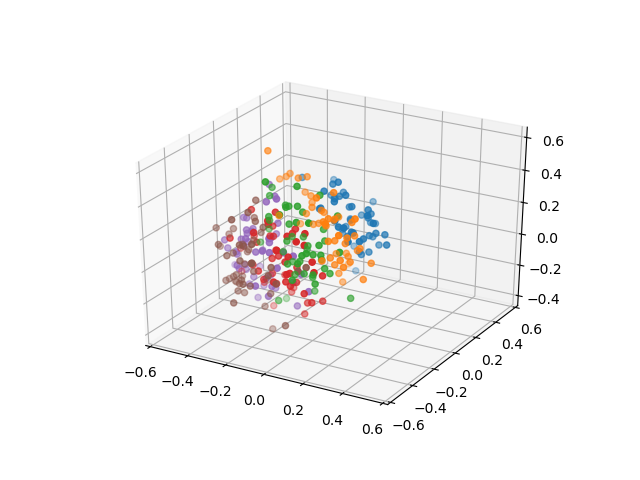

<IPython.core.display.Javascript object>


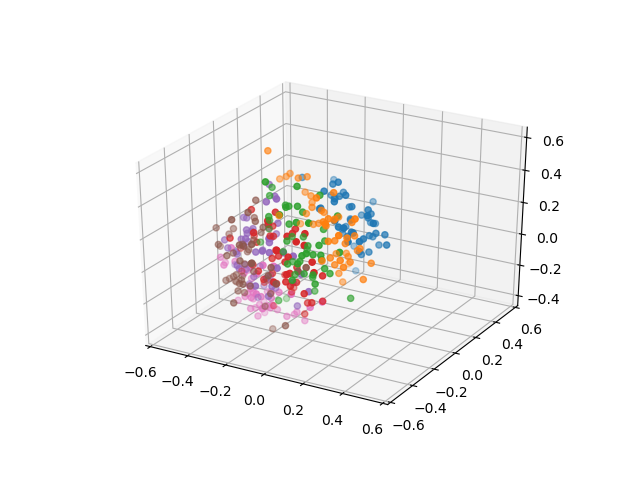

<IPython.core.display.Javascript object>


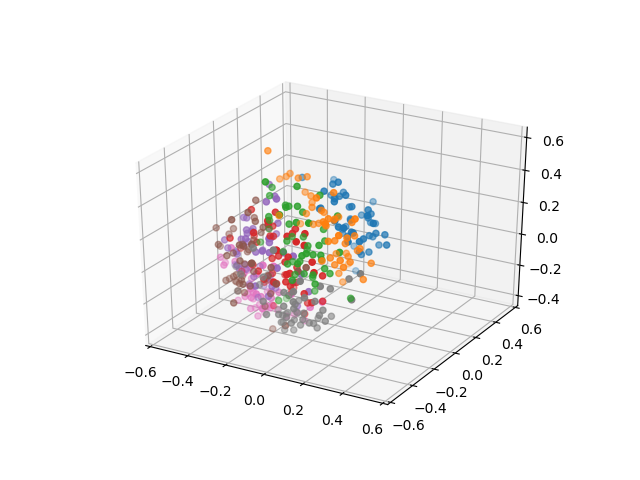

<IPython.core.display.Javascript object>


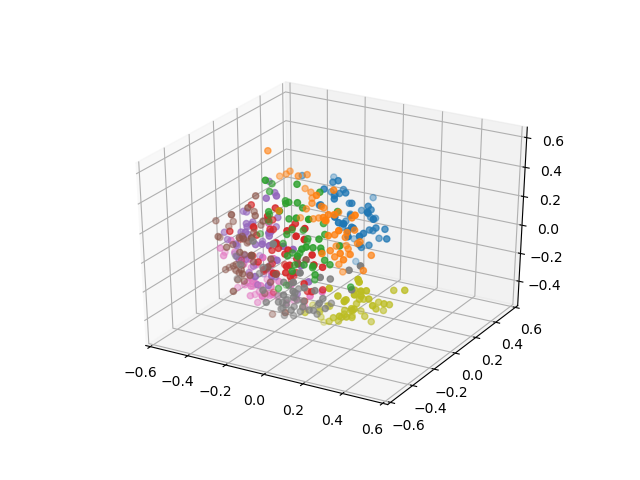

<IPython.core.display.Javascript object>


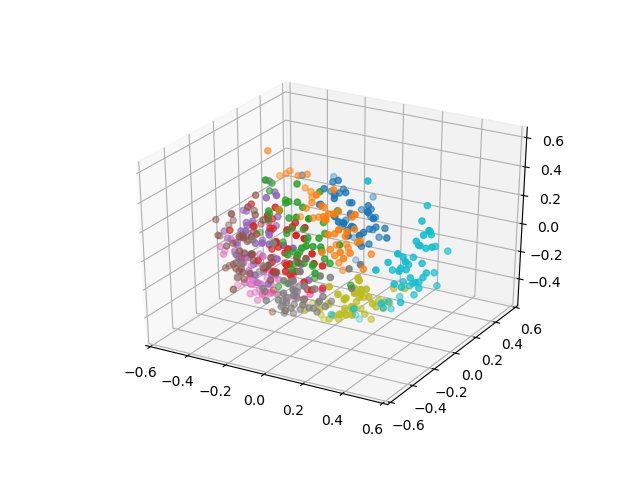

<IPython.core.display.Javascript object>


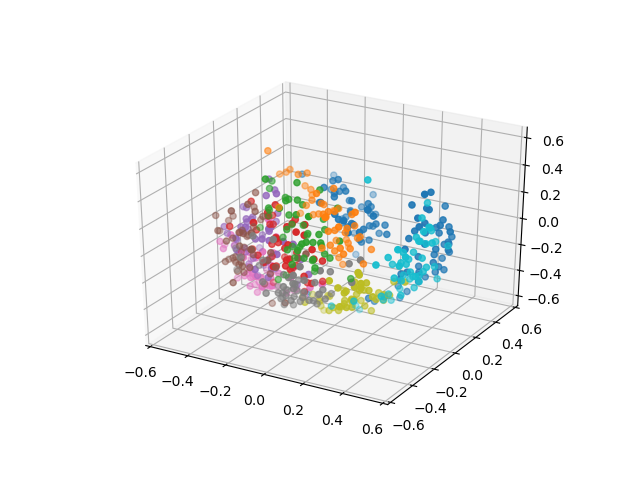

<IPython.core.display.Javascript object>


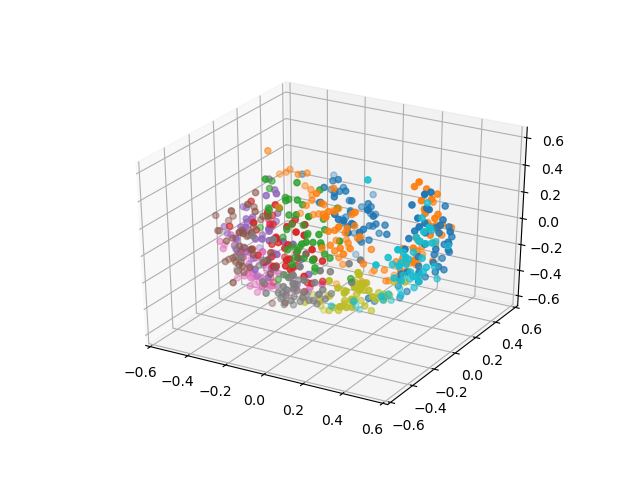

<IPython.core.display.Javascript object>


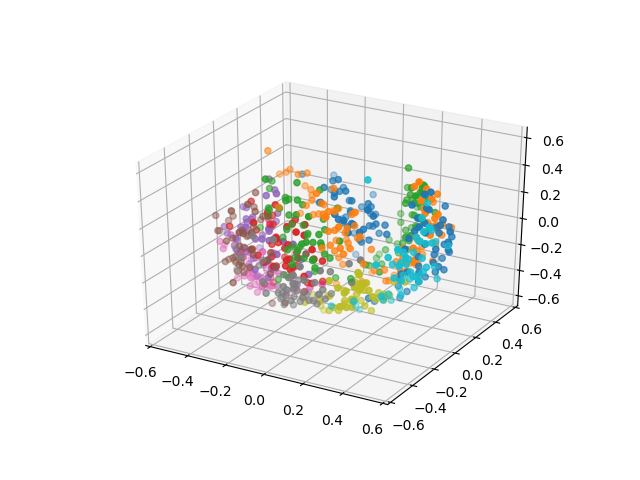

<IPython.core.display.Javascript object>


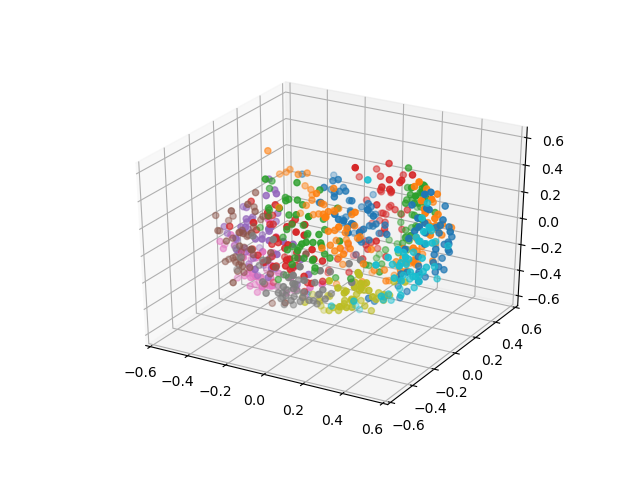

<IPython.core.display.Javascript object>


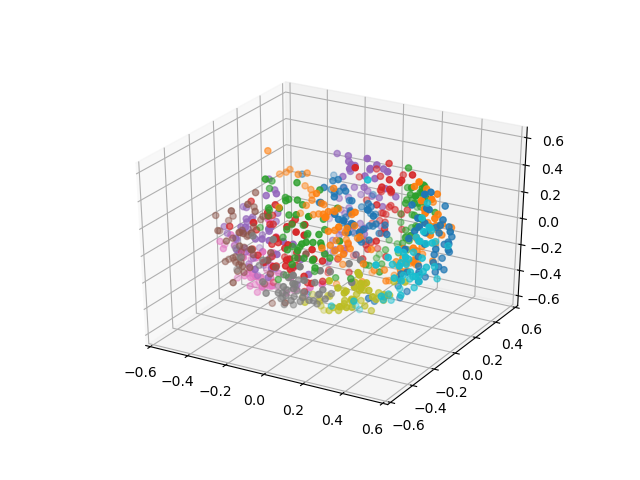

<IPython.core.display.Javascript object>


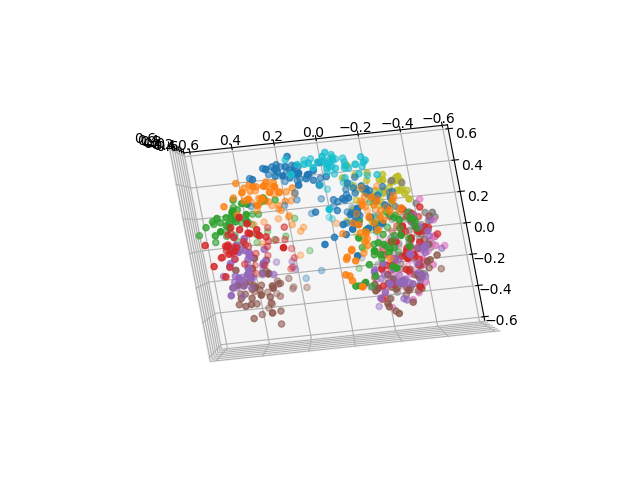

In [17]:
%matplotlib notebook

for j in range(17):
    plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(j):
        ax.scatter(X_transformed[50*i:50*i+50,0],X_transformed[50*i:50*i+50,1],X_transformed[50*i:50*i+50,2],cmap='viridis')
        plt.xlim([-0.6,0.6])
        plt.ylim([-0.6,0.6])

In [30]:
ListOfPDs=[]

for j in range(850):
    pers_diag0=Data.X.h0_t20_n_flip[j]
    pers_diag1=Data.X.h1_t20_n_flip[j]
    pers_diag=np.concatenate((pers_diag0,pers_diag1))
    pers_diag=np.array(pers_diag)
    ListOfPDs.append(pers_diag)


In [31]:
Data.X.h1_t20_n[0].shape

(119, 2)

Classification report for classifier RandomForestClassifier(max_depth=50):
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.87      0.93      0.90        14
         2.0       0.75      0.86      0.80         7
         3.0       0.80      0.67      0.73         6
         4.0       0.67      0.44      0.53         9
         5.0       0.67      0.62      0.64        13
         6.0       0.62      1.00      0.77        10
         7.0       1.00      0.40      0.57        10
         8.0       0.75      0.90      0.82        10
         9.0       0.83      0.83      0.83         6
        10.0       0.83      1.00      0.91        10
        11.0       1.00      0.80      0.89        10
        12.0       0.89      0.89      0.89         9
        13.0       0.81      0.93      0.87        14
        14.0       0.67      0.60      0.63        10
        15.0       0.60      0.67      0.63         9
      

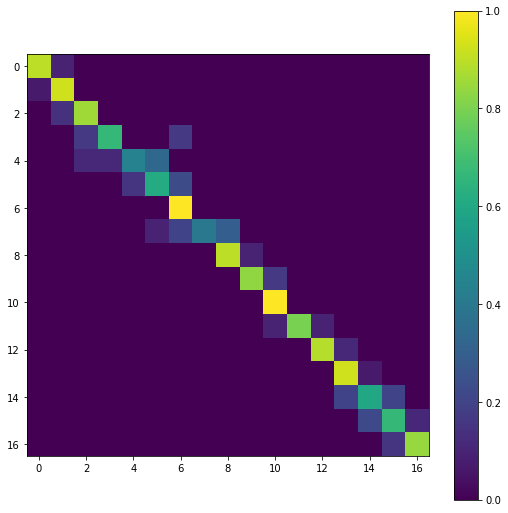

In [24]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
import time
from sklearn.metrics import confusion_matrix
start = time.process_time()
lbls=np.zeros([850,1])
for j in range(17):
    for i in range(50):
        lbls[50*j+i]=j       
        
X_train, X_test, y_train, y_test = train_test_split(
    pi, np.array(lbls), test_size=0.20, random_state=42)

clf = RandomForestClassifier(criterion = 'gini', max_depth = 50, n_estimators= 100)

clf.fit(X_train, np.ravel(y_train))
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)
print(metrics.accuracy_score(y_test, predicted))
Conf_mat=confusion_matrix(y_test,predicted,normalize='true')
fig,ax =  plt.subplots(figsize = (9,9))
im = ax.imshow(Conf_mat)
fig.colorbar(im)
fig.savefig('Confusion_matrix_RF.pdf')
#estimator = clf.estimators_[1]

#from sklearn.tree import export_graphviz
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
 #               feature_names = [str(i) for i in list(range(2500))],
  #              class_names = [str(i) for i in lbls],
   #             rounded = True, proportion = False, 
    #            precision = 2, filled = True)
end = time.process_time()
print("Elapsed time:", (end - start) , "s.")

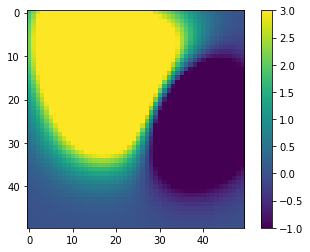

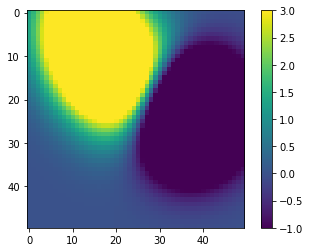

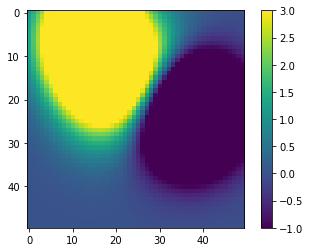

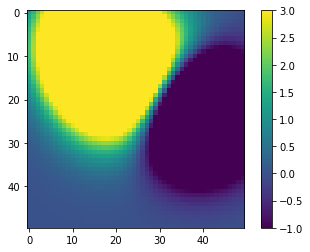

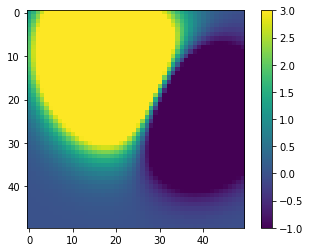

In [39]:
import numpy as np
r=50
PersDifference=np.array([pi[i+1,:]-pi[i,:] for i in range(849)])
for j in data_array:
    im=plt.imshow(np.flip(np.reshape(pi[j,:], [r,r]), 0))
    plt.colorbar(im)
    im.set_clim([-1,3])
    plt.show()

In [65]:
results_df.to_excel('RandomForestGridSearch.xlsx')

In [75]:
CorrelationMatrix=np.corrcoef(pi)

In [76]:
pd.DataFrame(CorrelationMatrix).to_csv("CorrelationMatrix.csv", header=None, index=None)

In [70]:
np.shape(CorrelationMatrix)


722500

Classification report for classifier KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20):
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        35
         1.0       0.79      0.73      0.76        37
         2.0       0.57      0.75      0.65        32
         3.0       0.27      0.21      0.24        33
         4.0       0.33      0.55      0.41        29
         5.0       0.34      0.38      0.36        34
         6.0       0.58      0.30      0.39        37
         7.0       0.73      0.67      0.70        33
         8.0       0.88      0.68      0.77        34
         9.0       0.76      1.00      0.86        28
        10.0       1.00      0.77      0.87        39
        11.0       0.81      0.81      0.81        32
        12.0       0.68      0.93      0.78        27
        13.0       0.77      0.65      0.70        31
        14.0       0.54      0.78      0.64        27
        15.0       0.70      0.50      

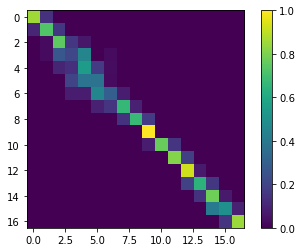

Elapsed time: 0.69182943200002 s.


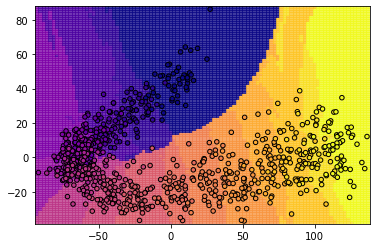

In [24]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble        import RandomForestClassifier
import time
from sklearn.metrics import confusion_matrix
start = time.process_time()
lbls=np.zeros([850,1])
for j in range(17):
    for i in range(50):
        lbls[50*j+i]=j       
        
X = pi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
        
X_train, X_test, y_train, y_test = train_test_split(
    X, np.array(lbls), test_size=0.65, random_state=42)

clf = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree', n_neighbors = 20)
#clf = SVC(kernel='linear', gamma = 'auto')
#clf = RandomForestClassifier(criterion = 'gini', max_depth = None, n_estimators= 200)

clf.fit(X_train, np.ravel(y_train))
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)
print(metrics.accuracy_score(y_test, predicted))
Conf_mat=confusion_matrix(y_test,predicted,normalize='true')
plt.imshow(Conf_mat)
plt.colorbar()
plt.show()

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap='plasma',
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )
plt.scatter(X[:, 0], X[:, 1], c=lbls, cmap='plasma', 
            edgecolor="k", s=20)
#plt.title("{} (k = {})".format(name, n_neighbors))
#plt.text(
#        0.9,
 #       0.1,
  #      "{:.2f}".format(score),
   #     size=15,
    ##   va="center",
      #  transform=plt.gca().transAxes,
    #)

end = time.process_time()
fig.savefig('KNN_decision_boundary_display.pdf')
print("Elapsed time:", (end - start) , "s.")

In [21]:
pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
Note: you may need to restart the kernel to use updated packages.
